# Analysis of growth rate, substrate uptake and yield

## Background
The second lecture in our biotechnology course delves into the critical aspect of data analysis in microbial growth dynamics experiments. Through hands-on exercises, students will gain proficiency in fitting dynamic growth data to mathematical models and extracting key parameters such as growth rate, substrate uptake rate, and yield. Three fundamental equations—linear, exponential, and logistic—will serve as the cornerstone for data fitting, each offering unique insights into microbial growth kinetics.

Linear equations, particularly when applied to the logarithm of biomass, provide a simplistic yet robust approach to characterizing microbial growth dynamics. By transforming the biomass data logarithmically, linear relationships can emerge, facilitating easier interpretation and calculation of growth parameters. However, linear equations may not adequately capture complex growth patterns exhibited by certain microorganisms under varying conditions.

> **_Linear equations_**<br>
>  $\rm{ln}(\it{N}(t)) = \mu t + \rm{ln(\it{N}_0)}$
>  - $N_0$: initial biomass, gDW/L 
>  - $\mu$: growth rate, /h
>  - $\rm{t}$: duration, h

Exponential equations offer a more nuanced representation of microbial growth, allowing for the depiction of exponential increases in cell number over time. This model is particularly suitable for describing rapid growth phases in microbial cultures with abundant nutrients. While exponential equations excel in capturing rapid growth kinetics, they may fall short in accounting for factors such as nutrient limitation or inhibitory effects.

> **_Exponential law_**<br>
>  $N(t) = N_0e^{\mu t}$
>  - $N_0$: initial biomass, gDW/L 
>  - $\mu$: growth rate, /h
>  - $t$: duration, h

Logistic equations provide a sophisticated framework for modeling microbial growth, incorporating a carrying capacity parameter that represents the maximum population size achievable in a given environment. This model is invaluable for elucidating growth dynamics under conditions of nutrient limitation or space constraints. However, logistic equations require more parameters to be fitted, increasing the complexity of data analysis and potentially introducing greater uncertainty.

> **_Logistic growth law (Verhulst)_**<br>
>  $N(t) = \frac{K}{1+\left( \frac{K-N_0}{N_0}e^{-\mu t} \right)}$
>  - $N_0$: initial biomass, gDW/L
>  - $\mu$: growth rate, /h
>  - $t$: duration, h
>  - $K$: carrying capacity, max biomass, gDW/L

Alternative growth laws like Gompertz and Baranyi models offer effective alternatives to traditional growth equations, especially in scenarios with complex growth patterns. Gompertz model captures sigmoidal growth, including lag phases, while Baranyi model considers initial microbial concentration and environmental conditions. They find applicability in food microbiology for predicting growth dynamics influenced by temperature, pH, and food composition, aiding in food safety assessment and shelf-life prediction.

> **_Gompertz function_** <br>
>  $N(t) = N_0e^{\left(\textrm{ln} \left(\frac{K}{N_0} \right)\left(1 - e^{-\mu t} \right) \right)}$
>  - $N_0$: initial biomass, gDW/L
>  - $\mu$: growth rate, /h
>  - $t$: duration, h
>  - $K$: carrying capacity, max biomass, gDW/L

---
Through practical exercises, students will gain insights into the advantages and disadvantages of each equation, learning to discern the most appropriate model for a given set of experimental data. Moreover, they will explore the significance of statistical measurements such as standard deviations and correlation coefficients in assessing the confidence of their results and guiding the design of future experiments.

The relevance of this topic to biotechnology is immense, as accurate characterization of microbial growth dynamics is essential for optimizing bioprocesses and enhancing product yields. By mastering data analysis techniques, students will be equipped to tackle real-world challenges in biotechnological research and industry, from designing efficient fermentation processes to developing novel bioproducts.

## Running simulations
The code cells below contain the commands to simulate the experiments. User input is required for variables that are by default set to `None`.

The results for each growth experiment should be stored and entered in the appropriate variables in section 2. final outcome of this sheet is an Excel file with simulated growth experiments containing biomass and substrate dynamics. The analysis of the Excel sheet to calculate growth rate, substrate uptake rate and yields is performed with the subsequent notebook [GroExpSim_Nr2](./GroExpSim_Nr2.ipynb).

## Learning Objectives:
1. Understand the principles underlying microbial growth dynamics and the importance of data analysis in biotechnology processes. (Knowledge)
2. Apply mathematical models such as linear, exponential, and logistic equations to analyze dynamic growth data and extract key parameters. (Application)
3. Evaluate the advantages and disadvantages of different growth models in capturing various growth patterns exhibited by microorganisms. (Analysis)
4. Interpret statistical measurements such as standard deviations and correlation coefficients to assess the confidence of experimental results. (Evaluation)
5. Propose strategies for optimizing experimental design to improve confidence intervals and enhance the reliability of growth kinetics measurements. (Synthesis)

### Additional information
- Verduyn et al., A theoretical evaluation of growth yields of yeasts, Antoie van Leeuwenhoek, 1991. doi [10.1007/BF00582119](https://doi.org/10.1007/BF00582119)
- Pirt, The maintenance energy of bacteria in growing cultures, 1965. doi [10.1098/rspb.1965.0069](https://doi.org/10.1098/rspb.1965.0069)
- Grijspeerdt & Vanrolleghem, Estimating the parameters of the Baranyi model for bacterial growth, Food Microbiology, 1999, doi [10.1006/fmic.1999.0285](https://doi.org/10.1006/fmic.1999.0285)
- A template for he data analysis with Excel sheet is provided by Tian and Reed in the Article [Sato et al.](https://journals.plos.org/plosgenetics/article?id=10.1371/journal.pgen.1006372) in Appendices 1+2.

## Workflow

**0 Set-up of computation environment**
 * *0.1 Loading Python libraries*
 * *0.2 Definition of functions*

**1 Data import**
 * *1.1 File definition*
 * *1.2 Sheet definition*

**2 Data plotting**

---

## 0 Set-up of simulation environment
### 0.1 Loading libraries
Loading libraries and fixing visualization. No user input necessary.

In [3]:
# Adapting environment to GitHub or Google Colab
# In GitHub, the full repository is available with all directories, and libraries can be installed with pip on requirements.txt
# In Google Colab only the selected notebook is loaded and the requirements file must be downloaded from GitHub before installation.
# 

# file system and path operations
import os
import sys
if 'google.colab' in sys.modules:
    IN_COLAB = True
    # Download the requirements file
    os.system('wget https://raw.githubusercontent.com/biolabsim/BioLabSim/refs/heads/master/requirements.txt')
    os.system('pip install -r requirements.txt')
else:
    IN_COLAB = False
    os.system('pip install -r ../requirements.txt')

print('Environment ready.')

Environment ready.


In [4]:
import os
# # import glob
# # import csv
import pandas as pd
import numpy as np
from datetime import date
from scipy import stats
from scipy.optimize import curve_fit
# # import ipywidgets as widgets

import matplotlib.pyplot as plt
%matplotlib inline

mol2g = {'glc':1/.18}
# All files are attached with the current date
Today = date.today().strftime('%y%m%d')
# print plus minus sign
pm = '\u00B1'

from silvio.catalog.GroExpSim import GrowthExperiment

Par_Bud = 5000


print('Libraries loaded.')

Libraries loaded.


### 0.2 Definition of functions

Below a function is defined that extracts a time vector that lies between two input times.

In [5]:
def SubVector(StartEnd, Vector):
    '''
    Extract a sub-vector based on start and end values. The output are the indices in the input vector.
    '''
    Above = Vector >= StartEnd[0]
    Below = Vector <= StartEnd[1]
    Select = np.logical_and(Above, Below)
    return np.arange(len(Vector))[Select]

## 1. Data loading

### 1.1 File definition
Here, the data generated in the notebook [GroExpSim_Nr1](GroExpSim_Nr1.ipynb) and stored in the `Data`-directory in file `GrowthExperiment_StandardFormat.xlsx`. However, before this file can be used, the metadata needs to be updated. In particular, the following analysis can only be performed if the metadata-field about the OD to cell dry weight conversion (OD2CDW) is completed. 

 - **Input:**
   - **`File`: String, Growth rate Excel file, e.g. 'GrowthExperiment_StandardFormat.xlsx'**
 - **Output:**
   - **Direct response of the available sheets in the Excel file.**

In [6]:
# General Working Directory
# For automatic reading of directory, e.g. in cloud use:
Root_Dir = os.getcwd()
# remove the last directory fro Root_Dir
Root_Dir = os.path.dirname(Root_Dir)
Target_Dir = os.path.join(Root_Dir, 'Data')

File = 'GrowthExperiment_StandardFormat.xlsx' # Add Excel file with growth data, e.g. GrowthExperiment_StandardFormat.xlsx
FileAddress = os.path.join(Target_Dir, File)
Xls_df = pd.ExcelFile(FileAddress)
print('Excel sheets:\n{}'.format(Xls_df.sheet_names))

# Output Files
SaveFig = False # set to True to save figures
# All files are attached with the current date
Today = date.today().strftime('%y%m%d')
# Choose image file type, e.g. svg, png, pdf, eps
ImageType = 'png'


Excel sheets:
['Reference']


### 1.2 Sheet definition
Select in the following cell the sheet with which an analysis should be performed. The commands in the cell read the metadata and extract the relevant information.

- **Input**
  - **`Sheet`: String, name of the sheet in the Excel file with the relevant data**
- **Output**
  - **Direct response of the data columns**

In [7]:
# Choosing Excel sheet
Sheet = 'Reference'
# Define conversion factor, e.g. yeast: 0.62 (BNID 111182 in Bionumbers)


# Loading data from sheet into python, ignoring Metadata columns
df_orig = pd.read_excel(FileAddress, sheet_name=Sheet, usecols=lambda x: 'Metadata' not in x,)
df_orig = df_orig.dropna(how = 'all')
DelHeader = df_orig.columns[['Unnamed' in header for header in df_orig.columns]].values
df_orig = df_orig.drop(DelHeader, axis=1)

myMeta = pd.read_excel(FileAddress, sheet_name=Sheet, usecols=lambda x: 'Metadata' in x,)
TimeUnit = ''.join(myMeta.loc[myMeta['Metadata: Key']=='Time unit']['Metadata: Value'].values)
# add a biomass correction factor, e.g. from OD to gCDW, if none set to 1
BiomassUnit = ''.join(myMeta.loc[myMeta['Metadata: Key']=='Biomass unit']['Metadata: Value'].values)
# read or define existing conversion factor for OD to gCDW/L and assert that it is a float
OD2DW = myMeta.loc[myMeta['Metadata: Key']=='OD2CDW']['Metadata: Value'].values[0]
# assert that OD2DW is not nan
OD2DW = OD2DW if not np.isnan(OD2DW) else float(input('give OD2DW:'))
BiomassUnit = 'gDW/L'

SubstrateUnit = ''.join(myMeta.loc[myMeta['Metadata: Key']=='Substrate unit']['Metadata: Value'].values)# 'mM'
# add a substrate correction factor, e.g. to convert from g/l to mM
SubstrateID = ''.join(myMeta.loc[myMeta['Metadata: Key']=='Substrate']['Metadata: Value'].values).lower()
# conversion of g/L concentration to mmol/L
SubstrateCorr = mol2g[SubstrateID]
YieldCorr = 1/mol2g[SubstrateID]

print('Data columns: {}'.format(list(df_orig.columns)))

Data columns: ['time', 'OD', 'Substrate']


## 2 Data plotting

The following cells plots the data of biomass and substrate over time. To do so, Python has to know into which columns to look and the right column Ids for the time, OD, and substrate measurements have to be supplied.

 - **Input**  
   - **`TimeID`: String, ID of column for time, e.g. 'time'
   - **`BiomassID`: String, ID of column for biomass, e.g. 'OD'
   - **`SubstrateID`: String, ID of column for substrate concentration, e.g. 'Substrate'
 - **Output**
   - **Plot with biomass and substrate dynamics**

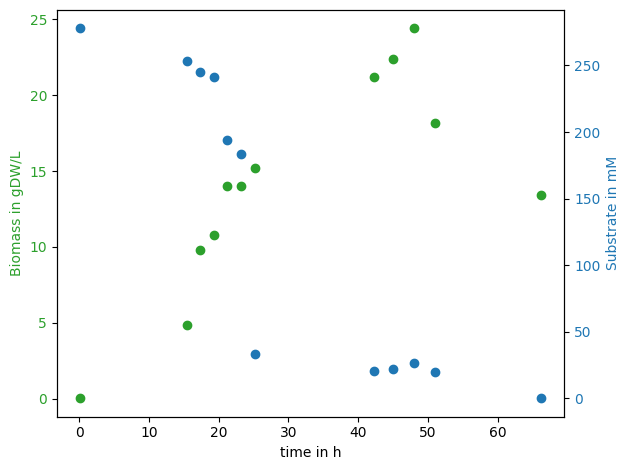

In [8]:
# Define the column names of biomass and substrate
TimeID = 'time'
BiomassID =  'OD'
SubstrateID = 'Substrate'

df=df_orig.copy()
# Convert OD to gCDW
df[BiomassID] = df_orig[BiomassID]*OD2DW
# Convert g/L to mM
df[SubstrateID] = df_orig[SubstrateID]*SubstrateCorr

fig, ax1 = plt.subplots()
#### Biomass plot
color = 'tab:green'
ax1.set_xlabel(f'time in {TimeUnit}')
ax1.set_ylabel(f'Biomass in {BiomassUnit}', color=color)
ax1.scatter(df[TimeID], df[BiomassID], color=color)
ax1.tick_params(axis='y', labelcolor=color)

#### Substrate plot
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Substrate in mM', color=color)  # we already handled the x-label with ax1
ax2.scatter(df[TimeID], df[SubstrateID], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

# Export plot to the Target_Dir if SaveFig is True
if SaveFig:
    ImageName = f'Growth_{Sheet}_{Today}.{ImageType}'
    ImageAddress = os.path.join(Target_Dir, ImageName)
    plt.savefig(ImageAddress)
    print(f'Image saved to {ImageAddress}')

plt.show()

### Growth law
More parameters mean that more properties of the growth curve can be reproduced, the curve can get more complex e.g. curved (+1 parameter in exponential law), or sigmoidal (+2 parameters in logistic law).

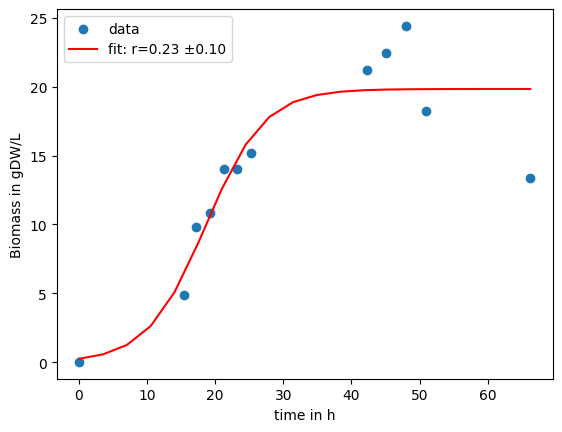

In [9]:
# linear function:          lambda t, m, b: m*t + b
# exponential function:     lambda t, r, y0: y0*np.exp(r*t)
# sigmidal function:        lambda t, r, y0, K: y0*K / (y0 + (K-y0)*np.exp(-r*t))
# Replace the function with the one you want to use
GrowthLaw = lambda t, r, y0, K: y0*K / (y0 + (K-y0)*np.exp(-r*t))

# Defining the time span for the fit
TimeSpan = [0,75]
# Extracting the time span
FitIndex = SubVector(TimeSpan, df[TimeID].values.reshape(-1))
# Extracting the time span from the dataframe using index and converting to numpy array
TimeFit = np.array(df[TimeID].iloc[FitIndex], dtype=float).reshape(-1)
# Extracting the biomass span from the dataframe using index and converting to numpy array
# If you are using the linear growth law, you have to use the log of the biomass, np.log()
BiomassFit = np.array(df[BiomassID].iloc[FitIndex], dtype=float).reshape(-1)
# Substrate span
SubstrateFit = np.array(df[SubstrateID].iloc[FitIndex], dtype=float).reshape(-1)

# Fitting the growth law to the biomass data
popt, pcov = curve_fit(GrowthLaw, TimeFit, BiomassFit)
rate, y_init = popt[0:2]
rate_sterr = np.sqrt(np.diag(pcov))[0]

# Plotting the fit
plt.scatter(TimeFit, BiomassFit, label='data')
plt.plot(np.linspace(TimeFit[0], TimeFit[-1],20), GrowthLaw(np.linspace(TimeFit[0], TimeFit[-1],20), *popt), 'r-', label=f'fit: r={rate:.2f} {pm}{rate_sterr:.2f}') #np.linspace(TimeFit[0], TimeFit[-1],20)
plt.xlabel(f'time in {TimeUnit}')
plt.ylabel(f'Biomass in {BiomassUnit}')
plt.legend()
plt.show()

### Substrate uptake rate

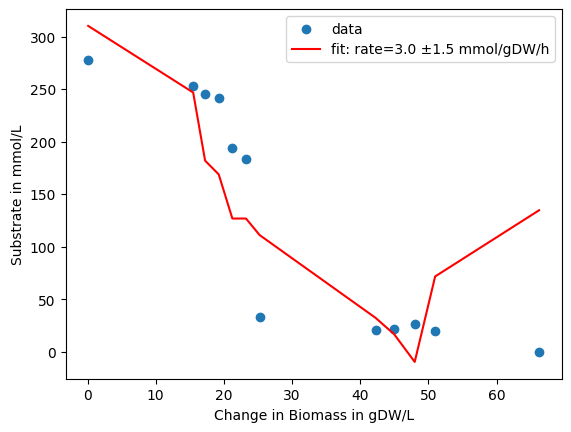

In [10]:
# Calculating substrate uptake rate
DeltaBm = np.array(BiomassFit-BiomassFit[0], dtype=float)
Sub_sl, Sub_ic, Sub_r, _, Sub_sl_sterr = stats.linregress(DeltaBm, SubstrateFit)
SubUp = round(-Sub_sl*rate,2)
SubUp_sterr = round(SubUp*np.sqrt( (Sub_sl_sterr/Sub_sl)**2 + (rate_sterr/rate)**2 ), 2)

# plot the linear regression
plt.scatter(TimeFit, SubstrateFit, label='data')
plt.plot(TimeFit, Sub_ic + Sub_sl*DeltaBm, 'r-', label=f'fit: rate={SubUp:.1f} {pm}{SubUp_sterr:.1f} mmol/gDW/h')
plt.xlabel(f'Change in Biomass in {BiomassUnit}')
plt.ylabel(f'Substrate in mmol/L')
plt.legend()
plt.show()

## Yield calculation

In [200]:
# calculation of the yield
Yield = round(rate/SubUp/.18,2)
Yield_sterr = round(Yield*np.sqrt( (SubUp_sterr/SubUp)**2 + (rate_sterr/rate)**2 ), 2)
print(f'Yield: {Yield} {pm} {Yield_sterr} gDW/mmol')

Yield: 0.29 ± 0.04 gDW/mmol


### Summary of multiple experiments

The initial substrate concentration and the measured growth rate can be effectively combined using the Monod equation, which relates the specific growth rate of microorganisms to the substrate concentration. By fitting experimental data to the Monod equation, biotechnologists can determine the substrate affinity of the microorganism, providing valuable insights into its metabolic characteristics and substrate utilization kinetics. This analysis allows for the quantification of substrate uptake rates and the prediction of growth behavior under varying nutrient conditions, enabling informed decisions in bioprocess optimization. Ultimately, leveraging the Monod equation enhances the efficiency and productivity of biotechnological processes by guiding substrate feeding strategies and maximizing microbial growth yields.

The growth rate $\mu$ is a function of the substrate level and can be calculated via the Monod equation:
- $\mu = \frac{\mu_{max}S}{K_S + S}$
  - $\mu$: growth rate, /h
  - $\mu_{max}$: maximum growth rate, /h
  - $S$: Substrate concentration, mmol/L
  - $K_S$: half velocity constant, the value of S when $\frac{\mu}{\mu_{max}} = 0.5$, mmol/L


In [201]:
InitialConc = [10,20,40,2,1]
GrowthRates = [.32,.28,.4,.12,.09]
GrowthRates_sterr = [.03,.03,.03,.01,.01]
SubUptake = [6,6,7.1,2.5,1.7]
SubUptake_sterr = [.7,.9,.8,.3,.2]
Yields = [.3,.25,.31,.27,.29]
Yields_sterr = [.04,.04,.04,.04,.04]

Yield: 0.3 ±0.03 gCDW/g and R2: 0.985833776552065
NGAM glucose requirement: 0.23 ±0.02 mmol/gCDW/h


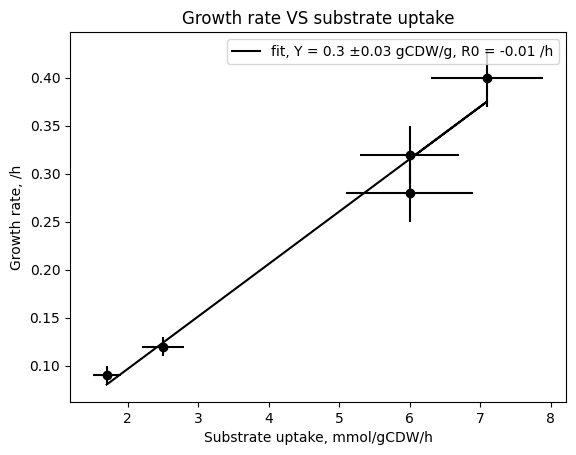

In [202]:
Yield, S0, r2, _, Yield_sterr = stats.linregress(SubUptake, GrowthRates)
Yield_gg = round(Yield/.18,2)
Yield_sterr_gg = round(Yield_sterr/.18,2)
# calculation of NGAM via the substrate uptake at zero growth, 
# Growth = Yield*SubUp + Int -> Growth=0, then SubUp(Growth=0) = -Int / Yield
NGAM = round(-S0/Yield,2)
NGAM_std = round((-S0/(Yield-Yield_sterr) - -S0/(Yield+Yield_sterr))/2,2)
print(f'Yield: {Yield_gg} {pm}{Yield_sterr_gg} gCDW/g and R2: {r2}')
print(f'NGAM glucose requirement: {NGAM} {pm}{NGAM_std} mmol/gCDW/h')
# Growth rate VS Substrate uptake plot
plt.errorbar(SubUptake, GrowthRates, xerr=SubUptake_sterr, yerr=GrowthRates_sterr, fmt='ok') #, 'xk', label='Substrate uptake'
plt.plot(SubUptake, S0+Yield*np.array(SubUptake), '-k', label=f'fit, Y = {Yield_gg} {pm}{Yield_sterr_gg} gCDW/g, R0 = {S0:.2f} /h')
plt.title('Growth rate VS substrate uptake')
plt.xlabel('Substrate uptake, mmol/gCDW/h')
plt.ylabel('Growth rate, /h')
plt.legend()
# plt.savefig(FigureAccelPath)
plt.show()
# print('Growth rate versus substrate uptake figure saved as {}'.format(FigureAccelPath))

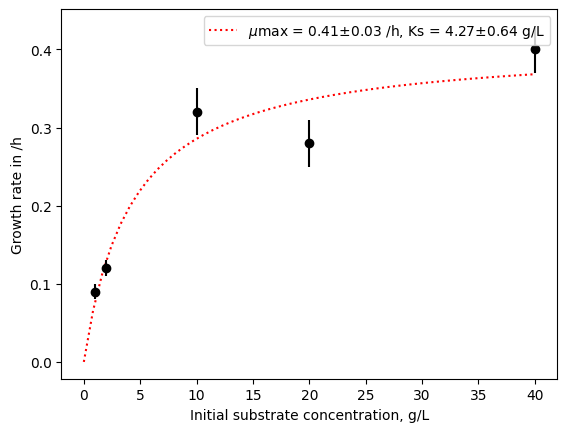

In [203]:
###############################
# Plot of initial substrate concentration versus substrate uptake rate
###############################

# define michaelis menten equation with lambda
MiMe = lambda x, Vmax, Ks: Vmax * x / (Ks + x)

# curve fitting
popt, pcov = curve_fit(MiMe, InitialConc, GrowthRates, sigma=GrowthRates_sterr, absolute_sigma=True)
perr = np.sqrt(np.diag(pcov))

# Estimate the parameters of the hyperbolic curve
Vmax = popt[0]
# standard deviation of the Vmax
Vmax_std = perr[0]

Ks = popt[1]
# standard deviation of the Km
Ks_std = perr[1]

# generating sample concentration values for the plot
x = np.linspace(0, np.max(InitialConc), 50)
# Plot the transformed data and the fitted curve
plt.plot(x, MiMe(x, Vmax, Ks), ':r', label=f'$\mu$max = {Vmax:.2f}±{Vmax_std:.2f} /h, Ks = {Ks:.2f}±{Ks_std:.2f} g/L')


# Initial substrate concentration VS substrate uptake plot
plt.errorbar(InitialConc, GrowthRates, yerr=GrowthRates_sterr, fmt='ok') #, 'xk', label='Substrate uptake'
plt.xlabel('Initial substrate concentration, g/L')
plt.ylabel('Growth rate in /h')
plt.legend()
# plt.savefig(InhibitCorrPath)
plt.show()
# print('Growth rate versus substrate uptake figure saved as {}'.format(InhibitCorrPath))

## Check your results
Testing values of:
- Optimal temperature
- OD to dry weight correlation
- Growth rate
- Maximum biomass
- Growth yield
- Glucose concentration with half maximum uptake rate
- Glucose maximum uptake rate

In [208]:
mySeed = 161710  # Your student ID
myInvest = 2000 # Your lab expenditure, choose anything between 1000-2500

exp = GrowthExperiment(mySeed, myInvest, Par_Bud)

Organism = 'ecol'
host = exp.create_host(Organism)

In [213]:
# Enter your determined optimal values for the parameters here. Delete parameters that are not calculated.
Temperature = 28
MaxBiomass = 19
OD2X = .459
GrowthYield_Avg = .3
GrowthYield_Std = .03
GrowthRate_Avg = .3
GrowthRate_Std = .03
GlcRateMax_Avg = 6
GlcRateMax_Std = 1
Ks_Avg = 4
Ks_Std = 1

Results = {'Temperature': Temperature,
           'MaxBiomass': MaxBiomass,
           'OD2X': OD2X,
           'GrowthYield_Avg': GrowthYield_Avg, 'GrowthYield_Std': GrowthYield_Std,
           'GrowthRate_Avg':GrowthRate_Avg, 'GrowthRate_Std':GrowthRate_Std, 
           'GlcRateMax_Avg': GlcRateMax_Avg, 'GlcRateMax_Std': GlcRateMax_Std,
           'Ks_Avg': Ks_Avg, 'Ks_Std': Ks_Std,
           } #
exp.check_Results(Organism, Results)

GlcRateMax: 6±1 mmol/gDW/h ✅
GrowthRate: 0.3±0.03 /h ❌ Value is 1.1x standard deviations from the reference value
GrowthYield: 0.3±0.03 g/g ✅
Ks: 4±1 g/L ❌ Value is 1.4x standard deviations from the reference value
MaxBiomass: 19 gDW/L ❌
OD2X: 0.459 a.u. ✅
Temperature: 28 °C ✅
